In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('Datasets\\titanic.csv',index_col='PassengerId')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.0,7.2500
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.9250
4,1,1,female,35.0,53.1000
5,0,3,male,35.0,8.0500


In [6]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
data['Age'] = imp.fit_transform(data['Age'].values.reshape(-1,1))

In [7]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [8]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex_n'] = le.fit_transform(X['Sex'])
X.drop('Sex',axis=1,inplace=True)

In [10]:
X.head()

,Pclass,Age,Fare,Sex_n
PassengerId,,,,
1,3,22.0,7.2500,1
2,1,38.0,71.2833,0
3,3,26.0,7.9250,0
4,1,35.0,53.1000,0
5,3,35.0,8.0500,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
X_test.shape

(179, 4)

In [13]:
X_train.shape

(712, 4)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
print(model.score(X_test,y_test))

0.8156424581005587


In [16]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8156424581005587


<Axes: >

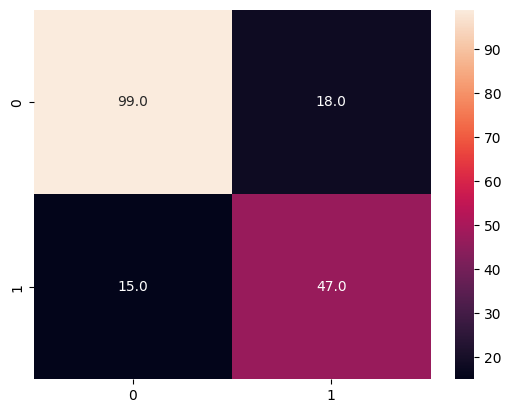

In [24]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(data=conf_mat, fmt=".1f", annot=True)

[0 1 1 1 0 0 0 0 1 1]
